# Imports

In [133]:
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np

# Loading data

In [134]:
def import_data():
    # Connecting to MySQL
    palworld_database = mysql.connector.connect(
        host="localhost",
        user="root",
        password="root",
        database="palworld_database"  # Make sure the database name is correct
    )
    cursor = palworld_database.cursor()

    # Importing the dataset
    cursor.execute("SELECT volume_size, genus_category FROM pals")  # Select only volume_size from pals
    volume_dataset = cursor.fetchall()

    # Closing the connection
    cursor.close()
    palworld_database.close()

    return volume_dataset






# About volume size of Pals 

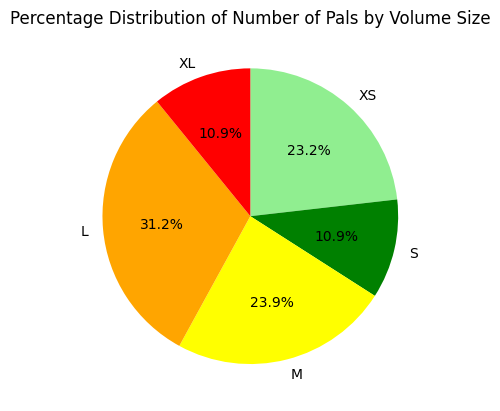

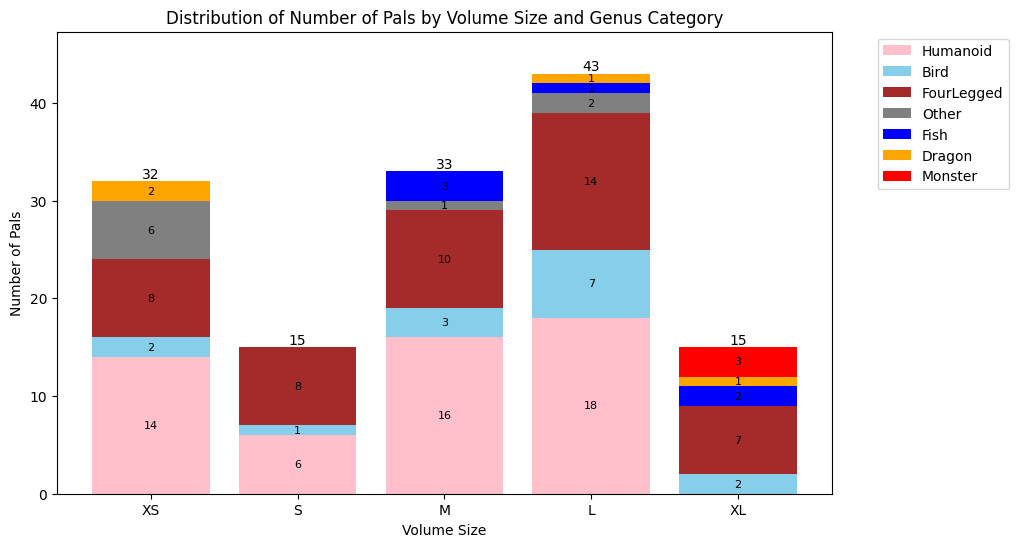

In [135]:
# Function to plot the distribution of number of pals by volume size and genus category
def volume_size_distribution_bar():
    # Importing the dataset
    volume_dataset = import_data()

    # Extracting volume_size and genus_category from the dataset
    volume_size = [row[0] for row in volume_dataset]  # row[0] because we only have one column
    genus_category = [row[1] for row in volume_dataset]  # assuming genus_category is in row[1]

    # Creating a dictionary to count the frequency of each volume size for each genus category
    volume_size_freq = {}
    for i in range(len(volume_size)):
        size = volume_size[i]
        category = genus_category[i]
        if size not in volume_size_freq:
            volume_size_freq[size] = {}
        if category in volume_size_freq[size]:
            volume_size_freq[size][category] += 1
        else:
            volume_size_freq[size][category] = 1

    # Defining color gradient for genus category
    colors = {'Humanoid': 'pink', 'Bird': 'skyblue', 'FourLegged': 'brown', 'Other': 'gray', 'Fish': 'blue', 'Dragon': 'orange', 'Monster': 'red'}

    # Ordering the sizes and categories in the desired order
    sizes_order = ['XS', 'S', 'M', 'L', 'XL']
    categories_order = ['Humanoid', 'Bird', 'FourLegged', 'Other', 'Fish', 'Dragon', 'Monster']

    # Plotting the chart
    fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
    bottom = np.zeros(len(sizes_order))
    for category in categories_order:
        values = [volume_size_freq[size].get(category, 0) for size in sizes_order]
        bars = ax.bar(sizes_order, values, bottom=bottom, color=colors[category])
        bottom += values

        # Adding the text inside the bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            if height != 0:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, str(value), ha='center', va='center', color='black', fontsize=8)

    # Adding the total number of pals above each bar
    for i, total in enumerate(bottom):
        ax.text(sizes_order[i], total, str(int(total)), ha='center', va='bottom', color='black', fontsize=10)

    ax.set_xlabel('Volume Size')
    ax.set_ylabel('Number of Pals')
    ax.set_title('Distribution of Number of Pals by Volume Size and Genus Category')
    ax.legend(categories_order, bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the right side of the plot
    ax.set_ylim(0, max(bottom)*1.1)  # Increase the maximum y-value by 10%

    plt.show()

# Function to plot the distribution of number of pals by volume size and genus category
def volume_size_distribution_pie():
    # Importing the dataset
    volume_dataset = import_data()

    # Extracting volume_size from the dataset
    volume_size = [row[0] for row in volume_dataset]  # row[0] because we only have one column

    # Creating a dictionary to count the frequency of each volume size
    volume_size_freq = {}
    for size in volume_size:
        if size in volume_size_freq:
            volume_size_freq[size] += 1
        else:
            volume_size_freq[size] = 1

    # Defining color gradient
    colors = {'XS': 'lightgreen', 'S': 'green', 'M': 'yellow', 'L': 'orange', 'XL': 'red'}

    # Ordering the sizes in the desired order
    sizes_order = ['XS', 'S', 'M', 'L', 'XL']
    volume_size_freq = {size: volume_size_freq.get(size, 0) for size in sizes_order}  # Use get() to avoid KeyError

    # Plotting the pie chart
    plt.pie(volume_size_freq.values(), labels=volume_size_freq.keys(), autopct='%1.1f%%', startangle=90, colors=[colors[size] for size in volume_size_freq.keys()], counterclock=False)
    plt.title('Percentage Distribution of Number of Pals by Volume Size')
    plt.show()

# Calling the functions
volume_size_distribution_pie()
volume_size_distribution_bar()



